### source & credit:

https://medium.com/@ismailghallou/build-your-perceptron-neural-net-from-scratch-e12b7be9d1ef

https://github.com/smakosh/Perceptron-neural-net-from-scratch

Sigmoid activation function

In [1]:
%matplotlib inline

In [2]:
from matplotlib import pyplot as plt
import numpy as np

In [3]:
# Features: height, weight, shoe-size, 
# Target: gender {0, 1} : 0 for male; 1 for female
data = [[1.81, 0.80, 0.44, 0],
        [1.77, 0.70, 0.43, 0],
        [1.60, 0.60, 0.38, 1],
        [1.54, 0.54, 0.37, 1],
        [1.66, 0.65, 0.40, 0],
        [1.90, 0.90, 0.47, 0],
        [1.75, 0.64, 0.39, 1],
        [1.77, 0.70, 0.40, 1],
        [1.59, 0.55, 0.37, 1],
        [1.71, 0.75, 0.42, 0],
        [1.81, 0.85, 0.43, 0]]

mystery_person = [1.63, 0.60, 0.37]

In [4]:
def sigmoid(x) :
    return 1/(1 + np.exp(-x))

def sigmoid_p(x) :
    return sigmoid(x) * (1-sigmoid(x))

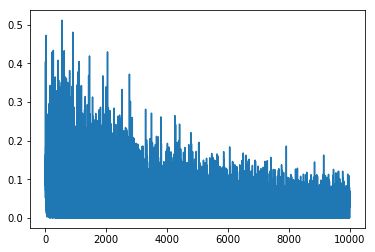

In [5]:
# training loop
learning_rate = 0.2
costs = []

w1 = np.random.randn()
w2 = np.random.randn()
w3 = np.random.randn()
b = np.random.randn()

# for i in range(100000000) :
for i in range(1000000) :
    ri = np.random.randint(len(data))
    point = data[ri]
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
    prediction = sigmoid(z)
    
    target = point[3]
    cost = np.square(prediction - target)
    
    dcost_prediction = 2 * (prediction - target)
    dprediction_dz = sigmoid_p(z)
    
    dz_dw1 = point[0]
    dz_dw2 = point[1]
    dz_dw3 = point[2]
    dz_db = 1
    
    dcost_dz = dcost_prediction * dprediction_dz
    
    dcost_dw1 = dcost_dz * dz_dw1
    dcost_dw2 = dcost_dz * dz_dw2
    dcost_dw3 = dcost_dz * dz_dw3
    dcost_db = dcost_dz * dz_db
    
    w1 = w1 - learning_rate * dcost_dw1
    w2 = w2 - learning_rate * dcost_dw2
    w3 = w3 - learning_rate * dcost_dw3
    b = b - learning_rate * dcost_db
    
    if i % 100 == 0 :
        cost_sum = 0
        for j in range(len(data)) :
            point = data[ri]
            
            z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
            prediction = sigmoid(z)
            
            target = point[3]
            cost_sum += np.square(prediction - target)
            
        costs.append(cost_sum/len(data))

plt.plot(costs)

In [6]:
# prediction
for i in range(len(data)) :
    point = data[i]
    print(point)
    
    z = point[0] * w1 + point[1] * w2 + point[2] * w3 + b
    prediction = sigmoid(z)
    print("Prediction   : {} \nSigmoid Score: {}\n" .format('Female' if prediction<0.5 else 'Male', prediction))

[1.81, 0.8, 0.44, 0]
Prediction   : Female 
Sigmoid Score: 0.0009343176720024781

[1.77, 0.7, 0.43, 0]
Prediction   : Female 
Sigmoid Score: 0.14018176071492972

[1.6, 0.6, 0.38, 1]
Prediction   : Male 
Sigmoid Score: 0.7823798315592059

[1.54, 0.54, 0.37, 1]
Prediction   : Male 
Sigmoid Score: 0.9581048426112235

[1.66, 0.65, 0.4, 0]
Prediction   : Female 
Sigmoid Score: 0.28474242047722664

[1.9, 0.9, 0.47, 0]
Prediction   : Female 
Sigmoid Score: 7.6564691221114e-06

[1.75, 0.64, 0.39, 1]
Prediction   : Male 
Sigmoid Score: 0.9909945570455825

[1.77, 0.7, 0.4, 1]
Prediction   : Male 
Sigmoid Score: 0.7393576986775621

[1.59, 0.55, 0.37, 1]
Prediction   : Male 
Sigmoid Score: 0.9917410086194777

[1.71, 0.75, 0.42, 0]
Prediction   : Female 
Sigmoid Score: 0.0013829373866437078

[1.81, 0.85, 0.43, 0]
Prediction   : Female 
Sigmoid Score: 0.00011962058655999805



### Let's predict for the mystery_person = [1.63, 0.60, 0.37]

In [7]:
z = mystery_person[0] * w1 + mystery_person[1] * w2 + mystery_person[2] * w3 + b
prediction = sigmoid(z)
# prediction
print("Prediction   : {} \nSigmoid Score: {}\n" .format('Female' if prediction<0.5 else 'Male', prediction))

Prediction   : Male 
Sigmoid Score: 0.973084380729811



In [8]:
def guess_gender(height, weight, shoe_size) :
    z = height * w1 + weight * w2 + shoe_size * w3 + b
    prediction = sigmoid(z)
    if prediction < .5:
        print('male')
    else:
        print('female')

In [9]:
guess_gender(1.62, 0.49, 0.38)

female


In [10]:
guess_gender(1.62, 0.79, 0.38)

male


---